In [2]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)

In [3]:
import pandas as pd
import numpy as np
import time

In [4]:
#postinumerot ja keskipisteet
locs = pd.read_excel("DistanceMatrix.xlsx")
locs.head()

loc_dict = {}
for code,lat,long in zip(locs.Postalcode,locs.Lat,locs.Long):
    if len(str(code)) < 5:
        code = "0"*(5-len(str(code))) + str(code)
    loc_dict[code] = (lat,long)
loc_dict

{'00100': (60.17252774751168, 24.93158138142601),
 '00120': (60.16300352722797, 24.93655099145235),
 '00130': (60.16483582518374, 24.94978558198563),
 '00140': (60.15662043190476, 24.95172916898666),
 '00150': (60.15616836757606, 24.93835142683817),
 '00160': (60.16601385800652, 24.97104012296936),
 '00170': (60.17346508567756, 24.95515059388143),
 '00180': (60.16221150947137, 24.91886722850244),
 '00190': (60.14749952405393, 24.98472498837529),
 '00200': (60.15566722866312, 24.85718738933722),
 '00210': (60.15006928921795, 24.8848889524433),
 '00220': (60.15444628574977, 24.91392222097129),
 '00230': (60.21411494821039, 24.91920341208624),
 '00240': (60.19959269910711, 24.92715324759914),
 '00250': (60.18889293759288, 24.90958586262061),
 '00260': (60.17866596098909, 24.92276510038898),
 '00270': (60.19497072966874, 24.90404388140305),
 '00280': (60.20354765678655, 24.9061345355233),
 '00290': (60.18846246221029, 24.90500602358279),
 '00300': (60.20488150185436, 24.89129793288649),
 '

In [5]:
travel_types = ['walk','bike','public','drive']
travel_type_dict = {'walk':'walk','bike':'bike','public':'drive','drive':'drive'}
travel_speeds = [4,15,15,22.5]
travel_speedsms = [x*(1000/3600) for x in travel_speeds]

In [80]:
#generoi kaikille postinumeroille kartat
iterations = len(loc_dict.keys())
done_iter = 0
total_time = 0

for postcode in loc_dict.keys():
    loc = loc_dict[postcode]
    start = time.time()
    for mode,v in zip(travel_types,travel_speedsms):
        G = ox.graph_from_point(loc, dist=1200*v, simplify=True, network_type=travel_type_dict[mode])#max distance in 20mins
    
        graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
        filepath_html = 'html_maps/' + postcode + '_' + mode + '.html'
        graph_map.save(filepath_html)
    
        G_projected = ox.project_graph(G)
        folder_shp = 'shp_folders/' + postcode + '_' + mode
        ox.save_graph_shapefile(G_projected,filepath=folder_shp)
    end = time.time()
    iteration_time = end - start
    total_time = total_time + iteration_time
    done_iter = done_iter + 1
    remaining_iter = iterations - done_iter
    remaining_time = total_time * remaining_iter/done_iter
    print('Finished {}. Total iterations done: {} with elapsed time {}. Remaining {} with estimated time {}'.format(postcode,
                                                                                                                   done_iter,
                                                                                                                   total_time,
                                                                                                                   remaining_iter,
                                                                                                                   remaining_time))

Finished 00100. Total iterations done: 1 with elapsed time 320.9680509567261. Remaining 171 with estimated time 54885.53671360016
Finished 00120. Total iterations done: 2 with elapsed time 622.4525673389435. Remaining 170 with estimated time 52908.468223810196
Finished 00130. Total iterations done: 3 with elapsed time 927.4948780536652. Remaining 169 with estimated time 52248.87813035647
Finished 00140. Total iterations done: 4 with elapsed time 1166.978717327118. Remaining 168 with estimated time 49013.10612773895
Finished 00150. Total iterations done: 5 with elapsed time 1413.558263540268. Remaining 167 with estimated time 47212.84600224495
Finished 00160. Total iterations done: 6 with elapsed time 1679.5622835159302. Remaining 166 with estimated time 46467.889843940735
Finished 00170. Total iterations done: 7 with elapsed time 2071.1315190792084. Remaining 165 with estimated time 48819.528664009915
Finished 00180. Total iterations done: 8 with elapsed time 2349.899078845978. Remaini

KeyboardInterrupt: 

In [72]:
#generoi vain annetulle
postcode = '00100' 
loc = loc_dict[postcode]
start = time.time()
for mode,v in zip(travel_types,travel_speedsms):
    G = ox.graph_from_point(loc, dist=1200*v, simplify=True, network_type=travel_type_dict[mode])#max distance in 20mins
    
    graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
    filepath_html = 'html_maps/' + postcode + '_' + mode + '.html'
    graph_map.save(filepath_html)
    
    G_projected = ox.project_graph(G)
    folder_shp = 'shp_folders/' + postcode + '_' + mode
    ox.save_graph_shapefile(G_projected,filepath=folder_shp)
end = time.time()
print(end - start)

332.8191246986389


<AxesSubplot:>

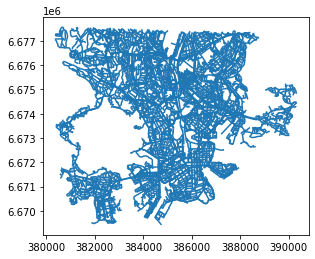

In [78]:
#plottaa kadut shapefilestä
map_plot = gpd.read_file("shp_folders/00100_bike/edges.shp")
map_plot.plot()

In [48]:
#plottaa .html
IFrame('helsinki.html', width=900, height=500)